In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Balanced_Data.csv')

Mounted at /content/drive


In [ ]:
# data.head()
# the data is already very clean, so I just downsized it to 10k with each number of data for each scores (at least for non-bag of words models)
downsampled_data = data.groupby('Score').apply(lambda x: x.sample(n=2000, random_state=42)).reset_index(drop=True)
print(downsampled_data.shape)
print(downsampled_data['Score'].value_counts())
downsampled_data.head()

(10000, 10)
Score
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64


<ipython-input-7-a5ce3b3eaa44>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  downsampled_data = data.groupby('Score').apply(lambda x: x.sample(n=2000, random_state=42)).reset_index(drop=True)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,122075,B005LNA5VK,A2K3TU5BIS0RMF,Shelby,0,6,1,1341878400,tastes like grass,I purchased this for the health benefits. Unf...
1,315939,B000EDK3RS,A1SPVNAK9HBTAT,Special Education Teacher,1,5,1,1312243200,Contains MSG!,"I like the taste of this dressing, but realize..."
2,307427,B001D0IZ4O,A2C216Z6CXBCCA,Martha Drummond,1,1,1,1265846400,Hate it.,Drink tasted like water...no chocolate taste a...
3,502262,B004H4LJ8W,A2HWR20S8OKDG,Cali_Girl_In_LA,1,1,1,1347494400,Tastes too sweet,This tastes very sweet compared to other brand...
4,214099,B000TOB8QW,A1XCM5HHAWFFFC,Sharon A. Carroll,0,0,1,1337817600,Strange taste,I ordered 3 jars of this calorie free Alfredo ...


In [24]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/downsampled_data.csv', usecols=["Score", "Text", "Summary"])
# just testing
def to_three(x):
  if x <= 2: return 1      # 1–2 stars → class 0
  if x == 3: return 2      # 3 stars   → class 1
  return 3                 # 4–5 stars → class 2

data['three_cls'] = data['Score'].map(to_three)

In [25]:
data.head()

,Score,Summary,Text,three_cls
0,1,tastes like grass,I purchased this for the health benefits. Unf...,1
1,1,Contains MSG!,"I like the taste of this dressing, but realize...",1
2,1,Hate it.,Drink tasted like water...no chocolate taste a...,1
3,1,Tastes too sweet,This tastes very sweet compared to other brand...,1
4,1,Strange taste,I ordered 3 jars of this calorie free Alfredo ...,1


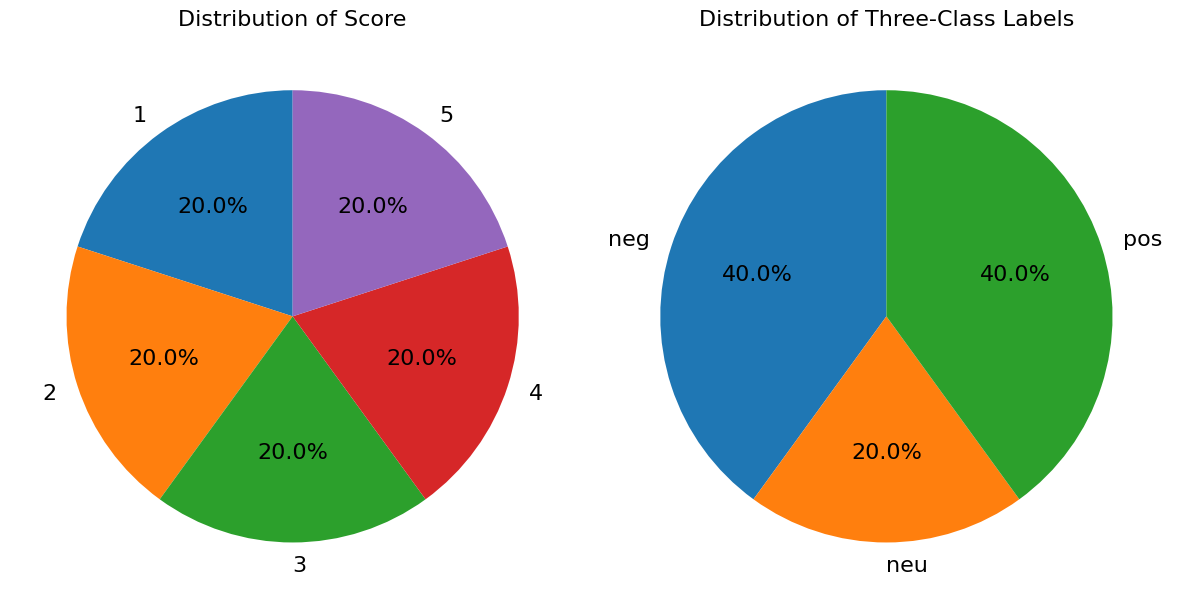

In [31]:
# Plot pie chart for 'Score'
label_map = {1: 'neg', 2: 'neu', 3: 'pos'}
three_cls_counts = data['three_cls'].value_counts().sort_index()
three_cls_labels = [label_map[i] for i in three_cls_counts.index]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data['Score'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90, fontsize=16)
plt.title('Distribution of Score', fontsize=16)
plt.ylabel('')  # Remove y-axis label

# Plot pie chart for 'three_cls'
plt.subplot(1, 2, 2)
plt.pie(three_cls_counts, labels=three_cls_labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
plt.title('Distribution of Three-Class Labels', fontsize=16)
plt.ylabel('')

plt.tight_layout()
plt.show()

In [7]:
# get a example with score 1, 3 and 5 for presentation


# Get examples with scores 1, 3, and 5
score_1_examples = data[data['Score'] == 1].head(3)  # Get first 3 examples with score 1
score_3_examples = data[data['Score'] == 3].head(3)  # Get first 3 examples with score 3
score_5_examples = data[data['Score'] == 5].head(3)  # Get first 3 examples with score 5

# Concatenate the examples
example_data = pd.concat([score_1_examples, score_3_examples, score_5_examples])

# Print the examples
example_data


,Score,Summary,Text
0,1,tastes like grass,I purchased this for the health benefits. Unf...
1,1,Contains MSG!,"I like the taste of this dressing, but realize..."
2,1,Hate it.,Drink tasted like water...no chocolate taste a...
4000,3,Too much salt!!!!,I like that these packages are just the right ...
4001,3,"as described, but I thought it'd be bigger","Definitely came with 72 packets, but I kind of..."
4002,3,Wellness Review Turkey/Salmon,We've been purchasing direct from retail store...
8000,5,Coffee-mate French Vanilla creamer- Heaven,"Love,love,love this creamer. It is so rich and..."
8001,5,Worth importing,"This soda is absolutly amazing, one of the bes..."
8002,5,Love this flavor!,Moving overseas and wanted to take some of the...


In [8]:
print(example_data.iloc[0]['Text'])

I purchased this for the health benefits.  Unfortunately I couldn't get past the taste.  The oily grassy taste was too much.  It ruined the flavor of anything I put it in.


In [11]:
print(example_data.iloc[3]['Text'])

I like that these packages are just the right size for 1-2 people and that there are very few unpopped kernels.  This does taste a lot like the popcorn at the movies.  If you like your popcorn very salty, this is the product for you!  However, I don't!  I like more butter flavor and only a little salt.  It's simple enough to snip off a small corner of the popcorn side of the packet and pour out most of the salt.  Unfortunately, out of the 20 packets I bought, six of them were not separated properly and the salt and kernels mixed with the oil, so I am stuck with the six overly salty bowls of popcorn.  I really wish this company made a low salt or unsalted version of these packs.  I'd definitely buy more if I didn't have to taste all that salt!


In [10]:
print(example_data.iloc[7]['Text'])

This soda is absolutly amazing, one of the best drinks I have ever tasted. The Coca-cola company should really start to produce it here.<br /><br />(ps. if anybody knows a place in the us where this is sold, please comment.)


In [12]:
score_3_examples = data[data['Score'] == 3].head(10)  # Get first 3 examples with score 3

In [13]:
score_3_examples.head(10)

,Score,Summary,Text
4000,3,Too much salt!!!!,I like that these packages are just the right ...
4001,3,"as described, but I thought it'd be bigger","Definitely came with 72 packets, but I kind of..."
4002,3,Wellness Review Turkey/Salmon,We've been purchasing direct from retail store...
4003,3,Tandoor Chef is reaping us off!,My whole family loves this and has been eating...
4004,3,"Bad for ""time sensitive"" deliveries","There is no option to select delivery date, an..."
4005,3,"Weak flavor profile, but at least it is decaf","I find the flavor of this chai, when made as d..."
4006,3,A bit too hard,These are supposed to be touched by brown suga...
4007,3,Good brownies to eat with ice cream,"I'm not on a diet or anything, my husband just..."
4008,3,Broken during shipping,The shipping was super fast but one of the onl...
4009,3,Savings = How much?,Oatmeal is a great food. I question the suppos...


In [9]:
print(score_3_examples.iloc[1]['Text'])

Definitely came with 72 packets, but I kind of expected the box to be bigger. 72 packets fits into a pretty small box! $16 is a lot for gummy bears, but I guess I got what I ordered so I'm satisfied enough. If you want 'em bad enough, it's certainly as advertised! just be aware of what you're getting for your money.


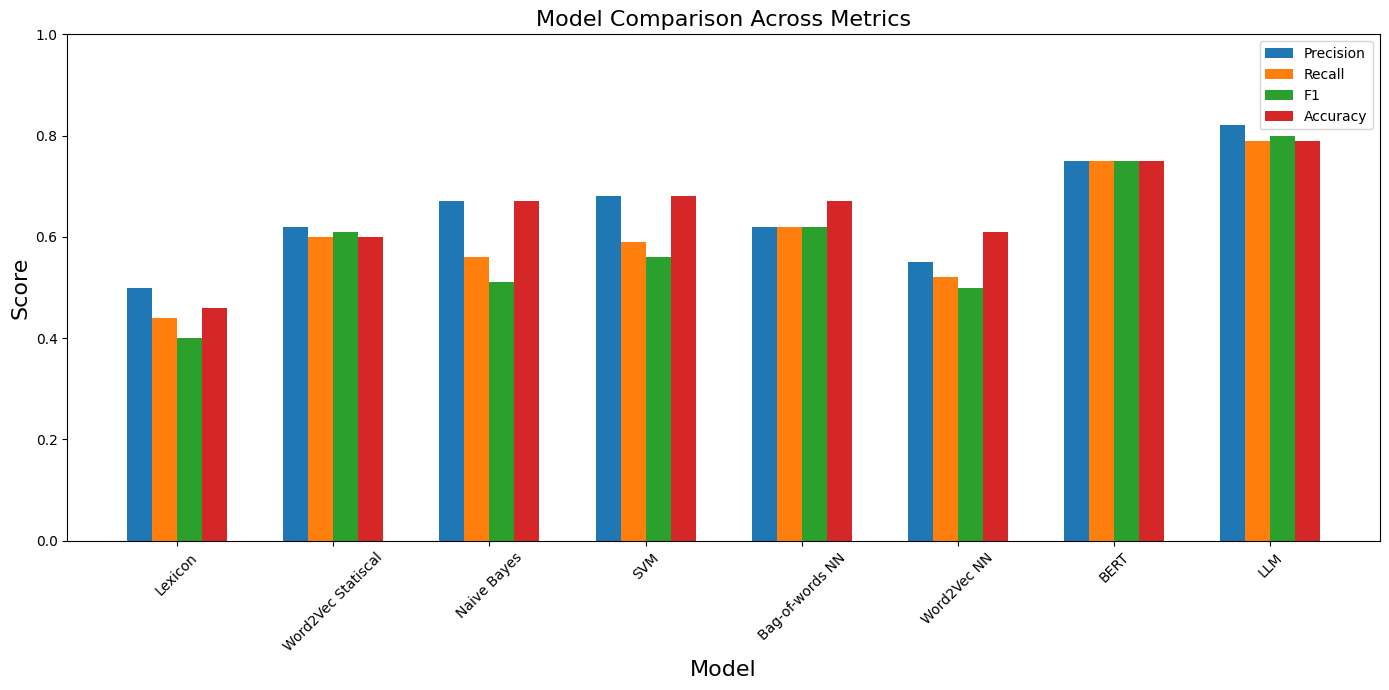

In [18]:
# make bar chart for summary of results
data = {
    'Lexicon': [0.50, 0.44, 0.40, 0.46],
    'Word2Vec Statiscal': [0.62, 0.60, 0.61, 0.60],
    'Naive Bayes': [0.67, 0.56, 0.51, 0.67],
    'SVM': [0.68, 0.59, 0.56, 0.68],
    'Bag-of-words NN': [0.62, 0.62, 0.62, 0.67],
    'Word2Vec NN': [0.55, 0.52, 0.50, 0.61],
    'BERT': [0.75, 0.75, 0.75, 0.75],
    'LLM': [0.82, 0.79, 0.80, 0.79]
}

metrics = ['Precision', 'Recall', 'F1', 'Accuracy']

df = pd.DataFrame(data, index=metrics)
n_metrics = len(metrics)
n_models = len(df.columns)
bar_width = 0.16
index = np.arange(n_models)

# Plot grouped bars
plt.figure(figsize=(14, 7))
for i, metric in enumerate(df.index):
    plt.bar(index + i * bar_width, df.loc[metric], bar_width, label=metric)

# Add labels and title
plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.title('Model Comparison Across Metrics', fontsize=16)
plt.xticks(index + bar_width * (n_metrics / 2 - 0.5), df.columns, rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()